In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

In [2]:
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


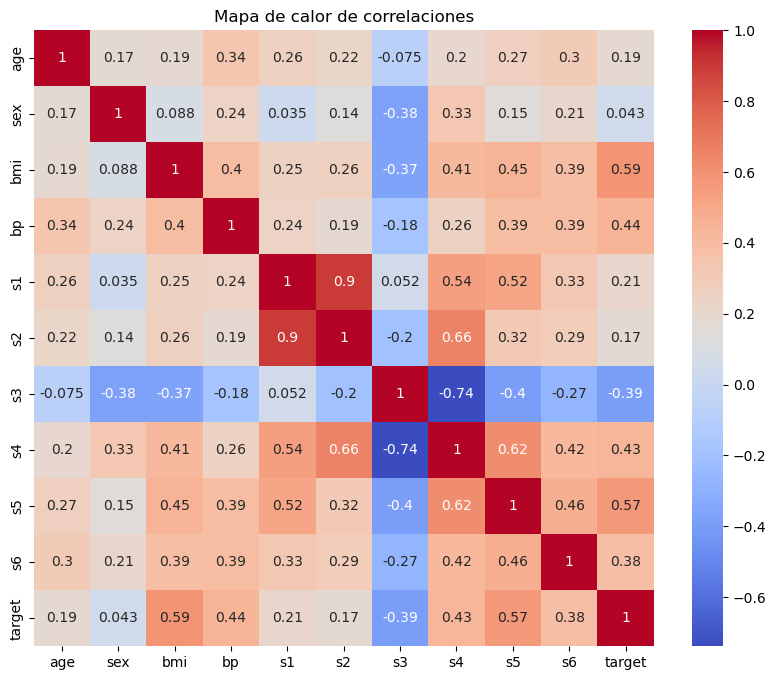

In [6]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

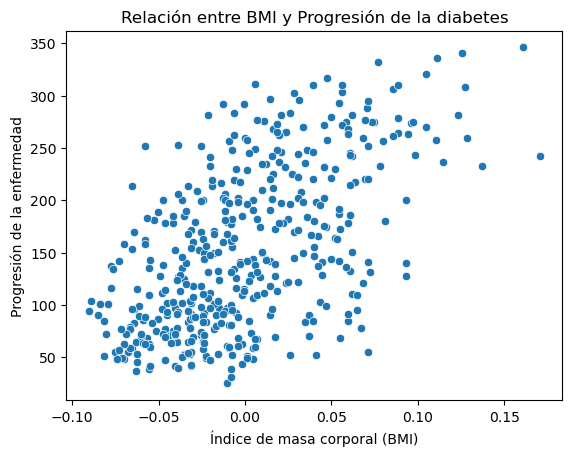

In [7]:
# Diagrama de dispersión: BMI vs Target
sns.scatterplot(x='bmi', y='target', data=df)
plt.title("Relación entre BMI y Progresión de la diabetes")
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Progresión de la enfermedad")
plt.show()

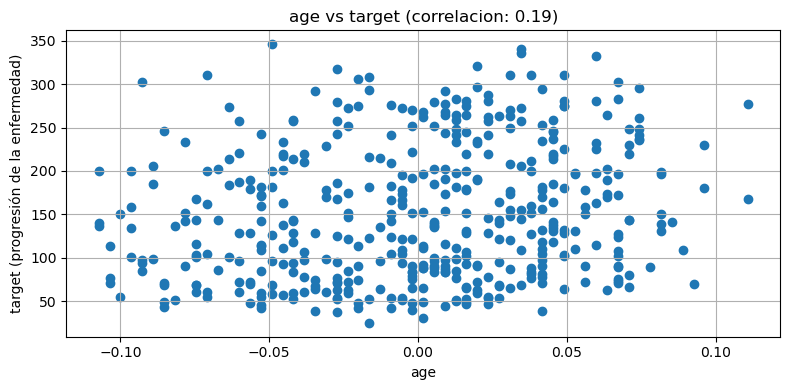

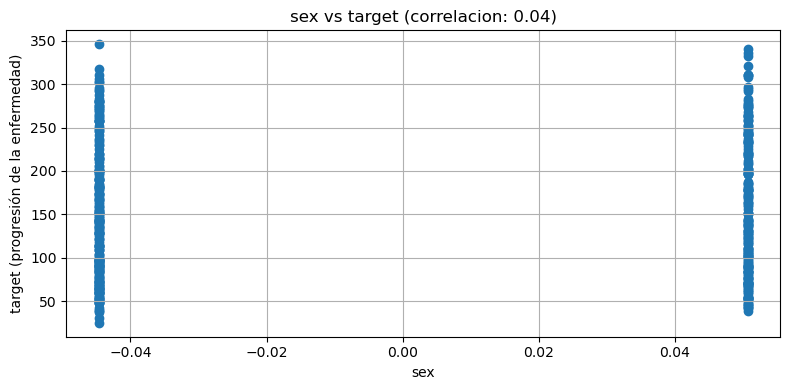

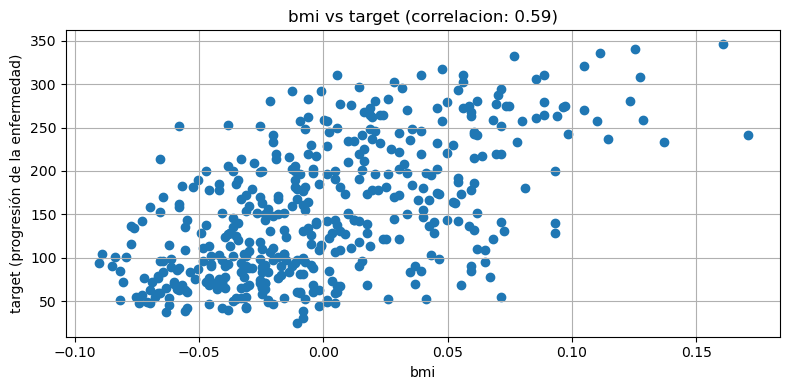

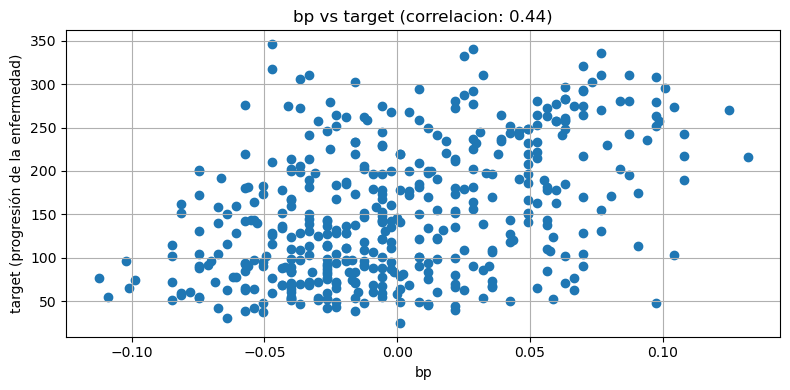

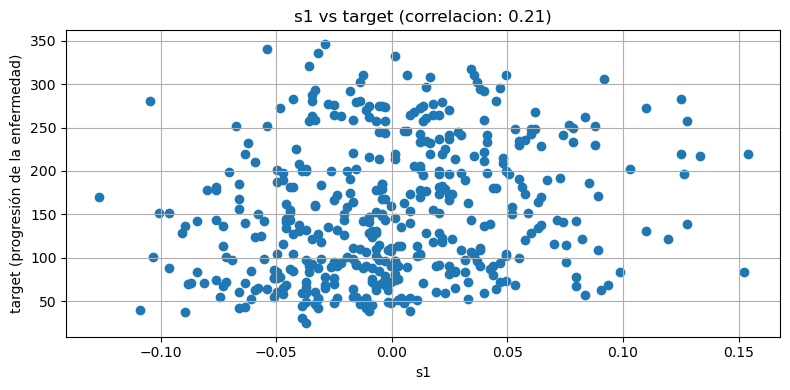

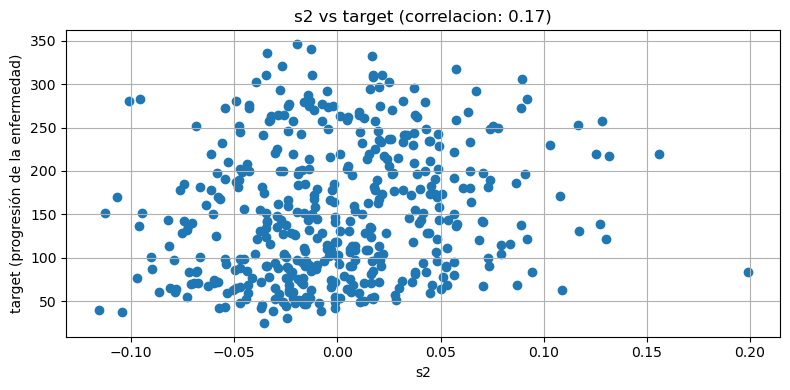

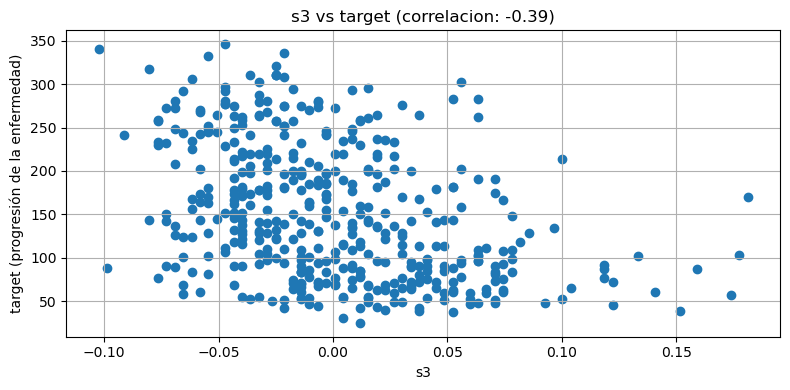

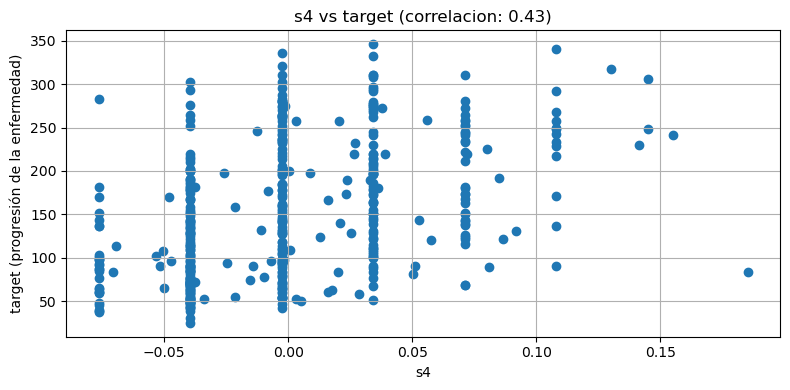

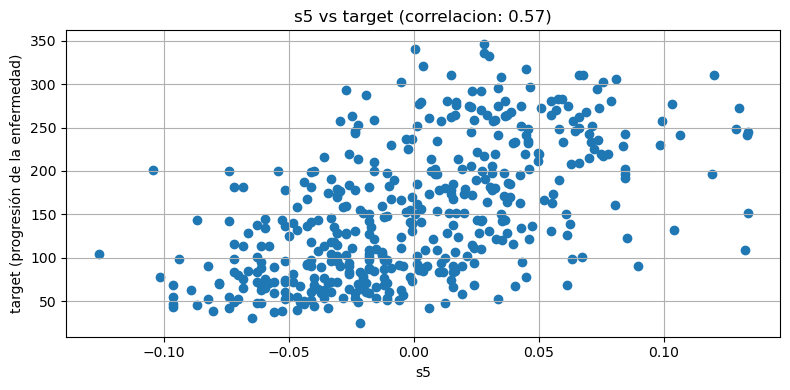

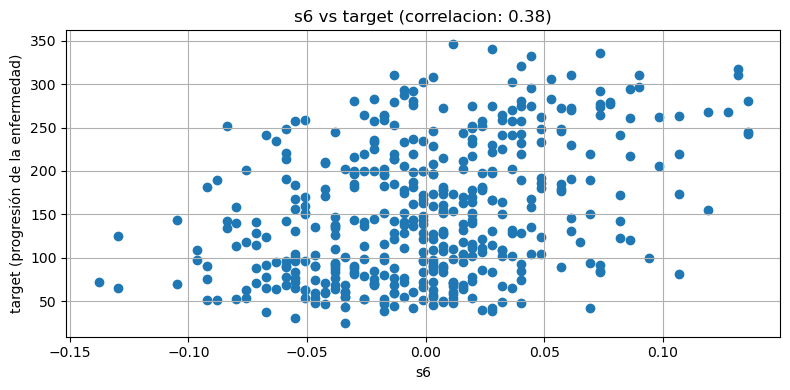

In [8]:
# Matriz de dispersión
# Crear un gráfico para cada columna
for column in df.columns[:-1]:
    correlacion = df[column].corr(df['target'])
    plt.figure(figsize=(8, 4))
    plt.scatter(df[column], df['target'])
    plt.title(f'{column} vs target (correlacion: {correlacion:.2f})')
    plt.xlabel(column)
    plt.ylabel('target (progresión de la enfermedad)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
correlaciones = df.corr()['target'].drop('target')

correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

print("Correlaciones con 'target' (de mayor a menor):\n")
print(correlaciones_ordenadas)

Correlaciones con 'target' (de mayor a menor):

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


In [10]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle=True)

modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train, y_train)

LinearRegression()

In [11]:
y_predict_multiple = modelo_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_predict_multiple)
r2_multiple = r2_score(y_test, y_predict_multiple)

print("MSE (múltiple):", mse_multiple)
print("R2 (múltiple):", r2_multiple)

MSE (múltiple): 2900.1936284934804
R2 (múltiple): 0.4526027629719196


In [12]:
df = df.drop(columns=['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [13]:
X = df[['bmi']]
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle=True)

modelo_simple = LinearRegression()
modelo_simple.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predict_simple = modelo_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_predict_simple)
r2_simple = r2_score(y_test, y_predict_simple)

print("MSE (simple):", mse_simple)
print("R2 (simple):", r2_simple)

MSE (simple): 4061.8259284949268
R2 (simple): 0.23335039815872138


In [15]:
# IMPLEMENTACION MANUAL

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Variables predictoras y objetivo
X = df.drop(columns='target')
y = df['target']

# Dividir en train/test (como en Scikit-learn)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Convertir a arrays de numpy
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)

In [16]:
# Añadir columna de unos para el intercepto
X_train_np = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])
X_test_np = np.hstack([np.ones((X_test_np.shape[0], 1)), X_test_np])

In [17]:
# Calcular coeficientes beta
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train_np
print("Coeficientes (manual):\n", beta.flatten())

Coeficientes (manual):
 [ 151.34560454   37.90402135 -241.96436231  542.42875852  347.70384391
 -931.48884588  518.06227698  163.41998299  275.31790158  736.1988589
   48.67065743]


In [18]:
# Predicción manual
y_pred_manual = X_test_np @ beta

In [19]:
# Métricas
mse_manual = mean_squared_error(y_test_np, y_pred_manual)
r2_manual = r2_score(y_test_np, y_pred_manual)

print(f"MSE (manual): {mse_manual:.2f}")
print(f"R² (manual): {r2_manual:.4f}")

MSE (manual): 2900.19
R² (manual): 0.4526


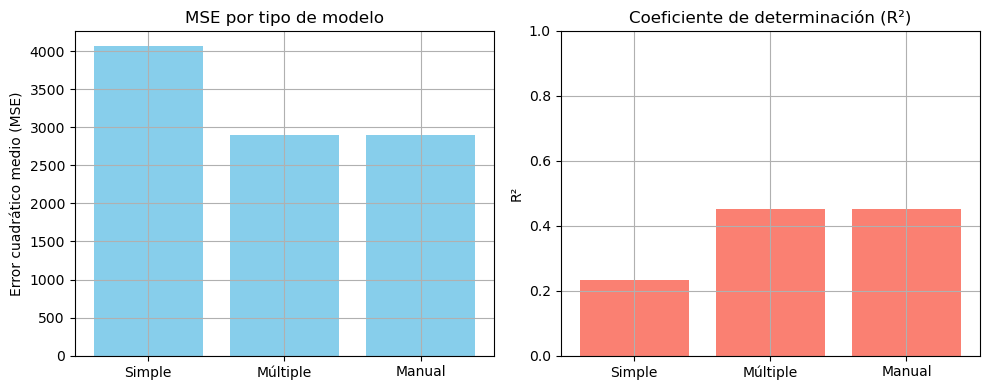

In [20]:
# Comparación de MSE y R² entre regresión simple, múltiple y manual
mse_simple = 4061.8259284949268
r2_simple = 0.23335039815872138

mse_multiple = 2900.1936284934804
r2_multiple = 0.4526027629719196

mse_manual = 2900.19
r2_manual = 0.4526

# Datos para las gráficas
modelos = ['Simple', 'Múltiple', 'Manual']
mses = [mse_simple, mse_multiple, mse_manual]
r2s = [r2_simple, r2_multiple, r2_manual]

# Gráfico de MSE
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(modelos, mses, color='skyblue')
plt.title('MSE por tipo de modelo')
plt.ylabel('Error cuadrático medio (MSE)')
plt.grid(True)

# Gráfico de R²
plt.subplot(1, 2, 2)
plt.bar(modelos, r2s, color='salmon')
plt.title('Coeficiente de determinación (R²)')
plt.ylabel('R²')
plt.ylim(0, 1)  # R² va de 0 a 1
plt.grid(True)

plt.tight_layout()
plt.show()